# Do you work for this exercise in either a jupyter notebook named evaluate within the regression directory. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within the regression directory.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

### 1.) Load the tips dataset from either pydataset or seaborn.

In [2]:
df = sns.load_dataset('tips')
x = df['total_bill']
y = df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2.) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

- Here is some sample code to get you started:

In [3]:
from statsmodels.formula.api import ols

model = ols('tip ~ total_bill', data=df).fit()
predictions = model.predict(df.total_bill)

> The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [4]:
df['yhat_baseline'] = df['tip'].mean()
df['yhat'] = predictions
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


### 3.) Plot the residuals for the linear regression model that you made.

In [6]:
df['residuals'] = df['yhat'] - df['tip']
df['residual_baseline'] = df['yhat_baseline'] - df['tip']

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


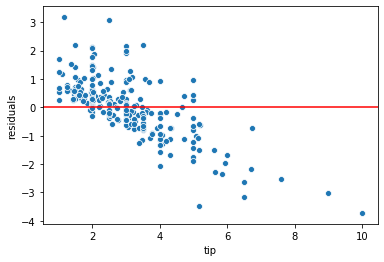

In [22]:
#residuals
sns.scatterplot(x='tip', y='residuals', data=df)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

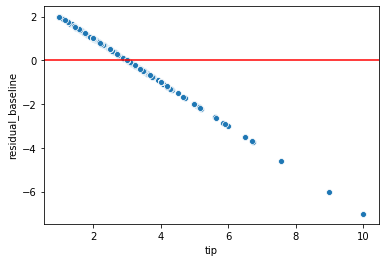

In [23]:
#baseline residuals
sns.scatterplot(x='tip', y='residual_baseline', data=df)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### 4.) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### 5.) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

### 6.) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

### 7.) What is the amount of variance explained in your model?

### 8.) Is your model significantly better than the baseline model?

### 9.) Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
- model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

### 10.) Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.